## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset** [datarium package], which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.


### Descriptive statistics





### Assumptions


#### Outliers




#### Normality




#### Homogeneity of variance




### Anova





### Post-hoc tests

If there is a significant 3-way interaction effect, you can decompose it into:

-    Simple two-way interaction: run two-way interaction at each level of third variable,
-    Simple simple main effect: run one-way model at each level of second variable,
-    Simple simple pairwise comparisons: run pairwise or other post-hoc comparisons if necessary.

If you do not have a statistically significant three-way interaction, you need to determine whether you have any statistically significant two-way interaction from the ANOVA output. You can follow up a significant two-way interaction by simple main effects analyses and pairwise comparisons between groups if necessary.

#### Two-way interactions




#### Main effects



#### Pairwise comparisons

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url='https://github.com/kflisikowski/ds/raw/master/headache.csv'
headache = pd.read_csv(url)
print(headache)

print(headache.info())
print(headache.describe())

    id  gender  risk treatment  pain_score
0    1    male   low         X   79.311695
1    2    male   low         X   76.843399
2    3    male   low         X   70.832421
3    4    male   low         X   81.163944
4    5    male   low         X   75.052213
..  ..     ...   ...       ...         ...
67  68  female  high         Z   82.786300
68  69  female  high         Z   81.265636
69  70  female  high         Z   80.419553
70  71  female  high         Z   87.142265
71  72  female  high         Z   79.609041

[72 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          72 non-null     int64  
 1   gender      72 non-null     object 
 2   risk        72 non-null     object 
 3   treatment   72 non-null     object 
 4   pain_score  72 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.9+ KB
None
     

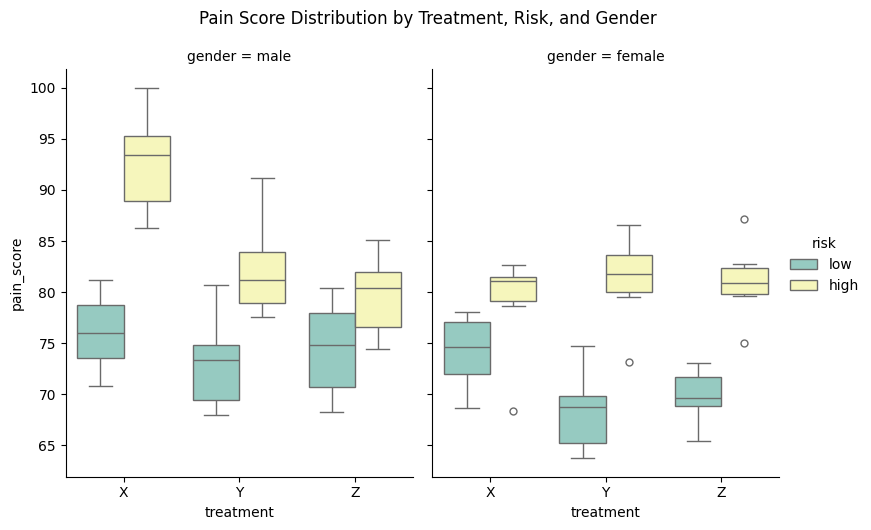

In [3]:

g = sns.catplot(
    data=headache,
    x="treatment",       
    y="pain_score",     
    hue="risk",          
    col="gender",        
    kind="box",          
    palette="Set3",
    height=5, 
    aspect=0.8
)


g.fig.suptitle("Pain Score Distribution by Treatment, Risk, and Gender", y=1.05)
plt.show()

In [4]:
desc_stats = headache.groupby(['gender', 'risk', 'treatment'])['pain_score'].agg(['mean', 'std', 'count'])
print(desc_stats)

                            mean       std  count
gender risk treatment                            
female high X          78.865059  5.316489      6
            Y          81.175304  4.619387      6
            Z          81.035142  3.984886      6
       low  X          74.156231  3.690272      6
            Y          68.361925  4.081842      6
            Z          69.779555  2.719645      6
male   high X          92.738847  5.116095      6
            Y          82.341542  5.000898      6
            Z          79.680736  4.045885      6
       low  X          76.051783  3.854876      6
            Y          73.138772  4.765061      6
            Z          74.455863  4.888865      6


<B>Outliers<B>

In [5]:
def identify_outliers(group):
    Q1 = group['pain_score'].quantile(0.25)
    Q3 = group['pain_score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['pain_score'] < lower_bound) | (group['pain_score'] > upper_bound)]
    return outliers


outliers = headache.groupby(['gender', 'risk','treatment']).apply(identify_outliers).reset_index(drop=True)
print(outliers)

   id  gender  risk treatment  pain_score
0  57  female  high         X   68.360185
1  62  female  high         Y   73.144392
2  67  female  high         Z   74.988057
3  71  female  high         Z   87.142265


C:\Users\barte\AppData\Local\Temp\ipykernel_22352\1455526459.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = headache.groupby(['gender', 'risk','treatment']).apply(identify_outliers).reset_index(drop=True)


Even though those rows are classified as outliers, in my opinion are still valid scores of pain, because some patients are more or less pain resistant, deleting those observations may increase the risk of finding a false positive result

In [ ]:
from scipy.stats import shapiro


def shapiro_test(group):
    stat, p_value = shapiro(group['pain_score'])
    return pd.Series({'W': stat, 'p_value': p_value})


shapiro_results = headache.groupby(['gender', 'risk','treatment']).apply(shapiro_test).reset_index()
print(shapiro_results)

    gender  risk treatment         W   p_value
0   female  high         X  0.714180  0.008690
1   female  high         Y  0.939332  0.653824
2   female  high         Z  0.971232  0.900604
3   female   low         X  0.932551  0.599938
4   female   low         Y  0.926774  0.555428
5   female   low         Z  0.957585  0.800946
6     male  high         X  0.958434  0.807595
7     male  high         Y  0.901730  0.384257
8     male  high         Z  0.955478  0.784303
9     male   low         X  0.982194  0.961928
10    male   low         Y  0.920272  0.507324
11    male   low         Z  0.924051  0.535007


C:\Users\barte\AppData\Local\Temp\ipykernel_22352\2793937688.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = headache.groupby(['gender', 'risk','treatment']).apply(shapiro_test).reset_index()


Only for one out of 12 groups normality is violated, (female high X where p=0.008690). Still, most of the data is normally distributed 

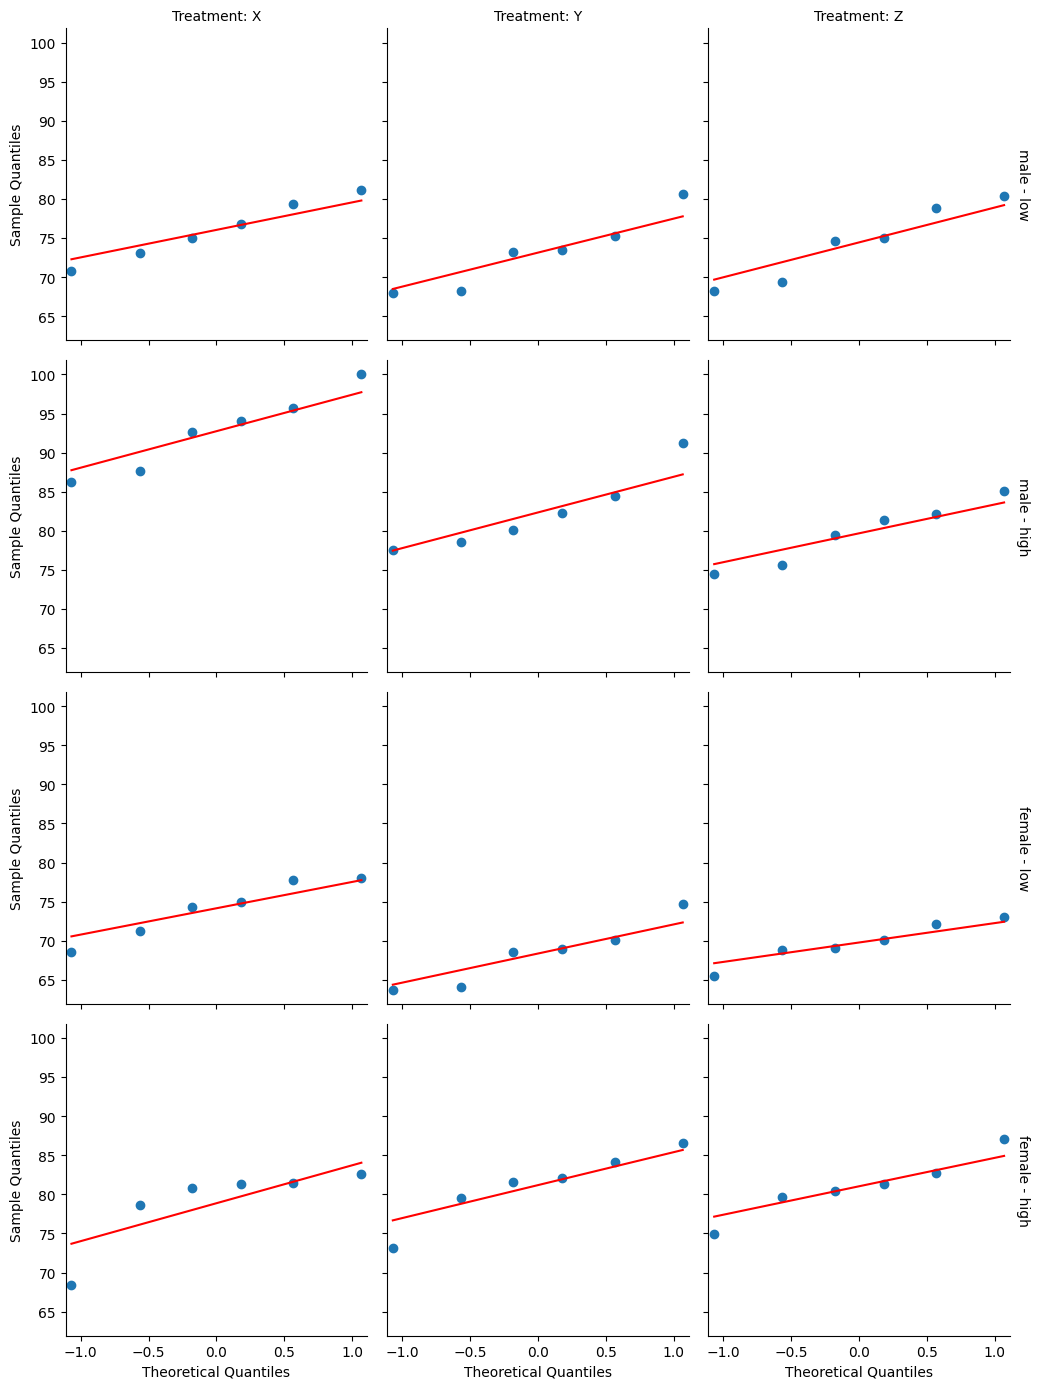

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

headache['group_id'] = headache['gender'] + " - " + headache['risk']

def qqplot(x, **kwargs):
    ax = plt.gca()
    sm.qqplot(x, line='s', ax=ax)
    if ax.get_legend():
        ax.get_legend().remove()

g = sns.FacetGrid(headache, row="group_id", col="treatment", 
                  margin_titles=True, height=3.5, aspect=1)

g.map(qqplot, 'pain_score')
g.set_axis_labels("Theoretical Quantiles", "Sample Quantiles")
g.set_titles(col_template="Treatment: {col_name}", row_template="{row_name}")

plt.show()

<B>Check of homogenity of variance using Levene's test<B>

In [8]:
from scipy.stats import levene

grouped_data = headache.groupby(['risk', 'treatment','gender'])['pain_score'].apply(list)
stat, p_value = levene(*grouped_data)

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

Levene's test statistic: 0.1785952808499546
p-value: 0.9982136500456728


 There is not significant difference between variances across groups. Therefore, we can assume the homogeneity of variances in the different groups.

<B>Anova<B>

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('pain_score ~ gender * risk * treatment', data=headache).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq    df          F        PR(>F)
gender                  313.358773   1.0  16.195746  1.625409e-04
risk                   1793.555757   1.0  92.698774  8.799980e-14
treatment               283.168031   2.0   7.317679  1.432844e-03
gender:risk               2.730584   1.0   0.141128  7.084867e-01
gender:treatment        129.182324   2.0   3.338353  4.220011e-02
risk:treatment           27.595016   2.0   0.713115  4.942214e-01
gender:risk:treatment   286.595625   2.0   7.406255  1.334476e-03
Residual               1160.892871  60.0        NaN           NaN


## Interpretation of Anova:
**gender:risk:treatment**: p < 0.05 there is statistically significant 3-way interaction between gender, risk and treatment. That means that efectivness of treatment depends on combination of gender and risk level <br>
**risk:treatment**: p > 0.05 if we ignore the gender the treatment seems to work the same way for both high-risk and low-risk patients ( but basing on above we know that gender does matter here)<br>
**gender:treatment**: p < 0.05 there is statistically significant 2-way interaction between gender and treatment. Generally, man and woman respond differently to the treatments<br>
**gender:risk**: p > 0.05, not significant interaction;The difference in pain scores between High Risk and Low Risk patients is the same for both men and women<br>
**treatment**: p < 0.05; there is statistically significant effect of type of treatment on pain scores <br>
**risk**:p < 0.05; there is statistically significant effect of risk level on pain scores<br>
**gender**: p < 0.05; there is statistically significant effect of gender on pain scores<br>

In summary, the effectiveness of headache treatments is highly specific to the combination of patient's gender and  risk level 

<B>Post-Hoc tests<B>

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def group_anova(group):
    model = ols('pain_score ~ treatment', data=group).fit()
    return anova_lm(model, typ=2)

anova_results = headache.groupby(['gender', 'risk']).apply(group_anova)
print(anova_results)

                           sum_sq    df          F    PR(>F)
gender risk                                                 
female high treatment   20.132278   2.0   0.461164  0.639198
            Residual   327.415509  15.0        NaN       NaN
       low  treatment  109.477870   2.0   4.358657  0.032188
            Residual   188.380042  15.0        NaN       NaN
male   high treatment  571.396212   2.0  12.687808  0.000595
            Residual   337.762949  15.0        NaN       NaN
       low  treatment   25.534637   2.0   0.623132  0.549583
            Residual   307.334371  15.0        NaN       NaN


C:\Users\barte\AppData\Local\Temp\ipykernel_22352\744185432.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anova_results = headache.groupby(['gender', 'risk']).apply(group_anova)


## Interpretation:
**high risk female**: treatment choice does not matter as p > 0.05, all drugs work equally well <br>
**low risk female**: p< 0.05, result is significant, the treatment does matter, at least one drug is different from the others <br>
**high risk male**: p < 0.05, the treatment does matter. at least one drug is different from the others, very strong effect <br>
**low risk male**: not siginificant, p > 0.05 the treatment choice does not matter <br>


<B>Pairwise comparisons:</B>

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd


significant_gr = [('female', 'low'), ('male', 'high')]


for g, r in significant_gr:
    data = headache[(headache['gender'] == g) & (headache['risk'] == r)]
    tukey = pairwise_tukeyhsd(endog=data['pain_score'],
                              groups=data['treatment'],
                              alpha=0.05)
    
    print(f"\nGroup: {g.upper()} - {r.upper()} Risk")
    print(tukey)


Group: FEMALE - LOW Risk
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     X      Y  -5.7943 0.0319 -11.1088 -0.4798   True
     X      Z  -4.3767 0.1153  -9.6912  0.9378  False
     Y      Z   1.4176 0.7712  -3.8969  6.7321  False
-----------------------------------------------------

Group: MALE - HIGH Risk
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     X      Y -10.3973 0.0047 -17.5135 -3.2811   True
     X      Z -13.0581 0.0007 -20.1743 -5.9419   True
     Y      Z  -2.6608 0.6054   -9.777  4.4554  False
-----------------------------------------------------


## Final Interpretation Of The Results:<br>
**High-Risk Males**: Treatment choice had the strongest impact on this group (p<.001).Treatment X resulted in significantly higher pain scores  compared to Treatment Y (Mean Diff = 10.4) and Treatment Z (Mean Diff = 13.1). Treatments Y and Z were equally effective.<br><br>
**Low-Risk Females**:A significant effect was also found (p=.03). Treatment Y was the most effective, resulting in significantly lower pain scores than Treatment X (Mean Diff = -5.8). Treatment Z fell in the middle and was not statistically different from either X or Y. <BR><br>
**High-Risk Females and Low-Risk Males**:For High-Risk Females and Low-Risk Males, no significant differences were found between treatments.
